## ML Review and Gradient Descent Example

In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [22]:
import sys
sys.version

'3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]'

In [23]:
# Preliminaries - packages to load
%matplotlib inline

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [24]:
np.random.uniform(0, 10, 5)

array([6.51463475, 2.76785887, 8.12130159, 2.39618541, 9.66546199])

In [25]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0, 10, num_obs)
x2 = np.random.uniform(0, 10, num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0, 0.5, num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const + theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const, x1, x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

In [26]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

## Exercise:
Solve the problem two ways:
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [27]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T, x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

# Solving by Gradient Descent
Another way to solve this problem is to use the method of Gradient Descent.  We will explore this method because (as we will see) Neural Networks are trained by Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise (Gradient Descent)

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.

In [725]:
## Label 1.5, 2, 5
## Parameters to play with
learning_rate = 0.01
num_iter = 10000
## Initialization steps
theta_initial = np.array([3, 3, 3])
theta = theta_initial
theta_path = np.zeros((num_iter+1, 3))
theta_path[0, :] = theta_initial

loss_vec = np.zeros(num_iter)

## Main Gradient Descent loop (for a fixed number of iterations)
for i in range(num_iter):
    y_pred = np.dot(theta.T, x_mat.T)
    loss_vec[i] = np.sum((y - y_pred)**2)
    grad_vec = (y - y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    theta = theta + learning_rate*grad_vec
    theta_path[i+1, :] = theta

array([1.49005184, 1.99675367, 5.0115627 ])

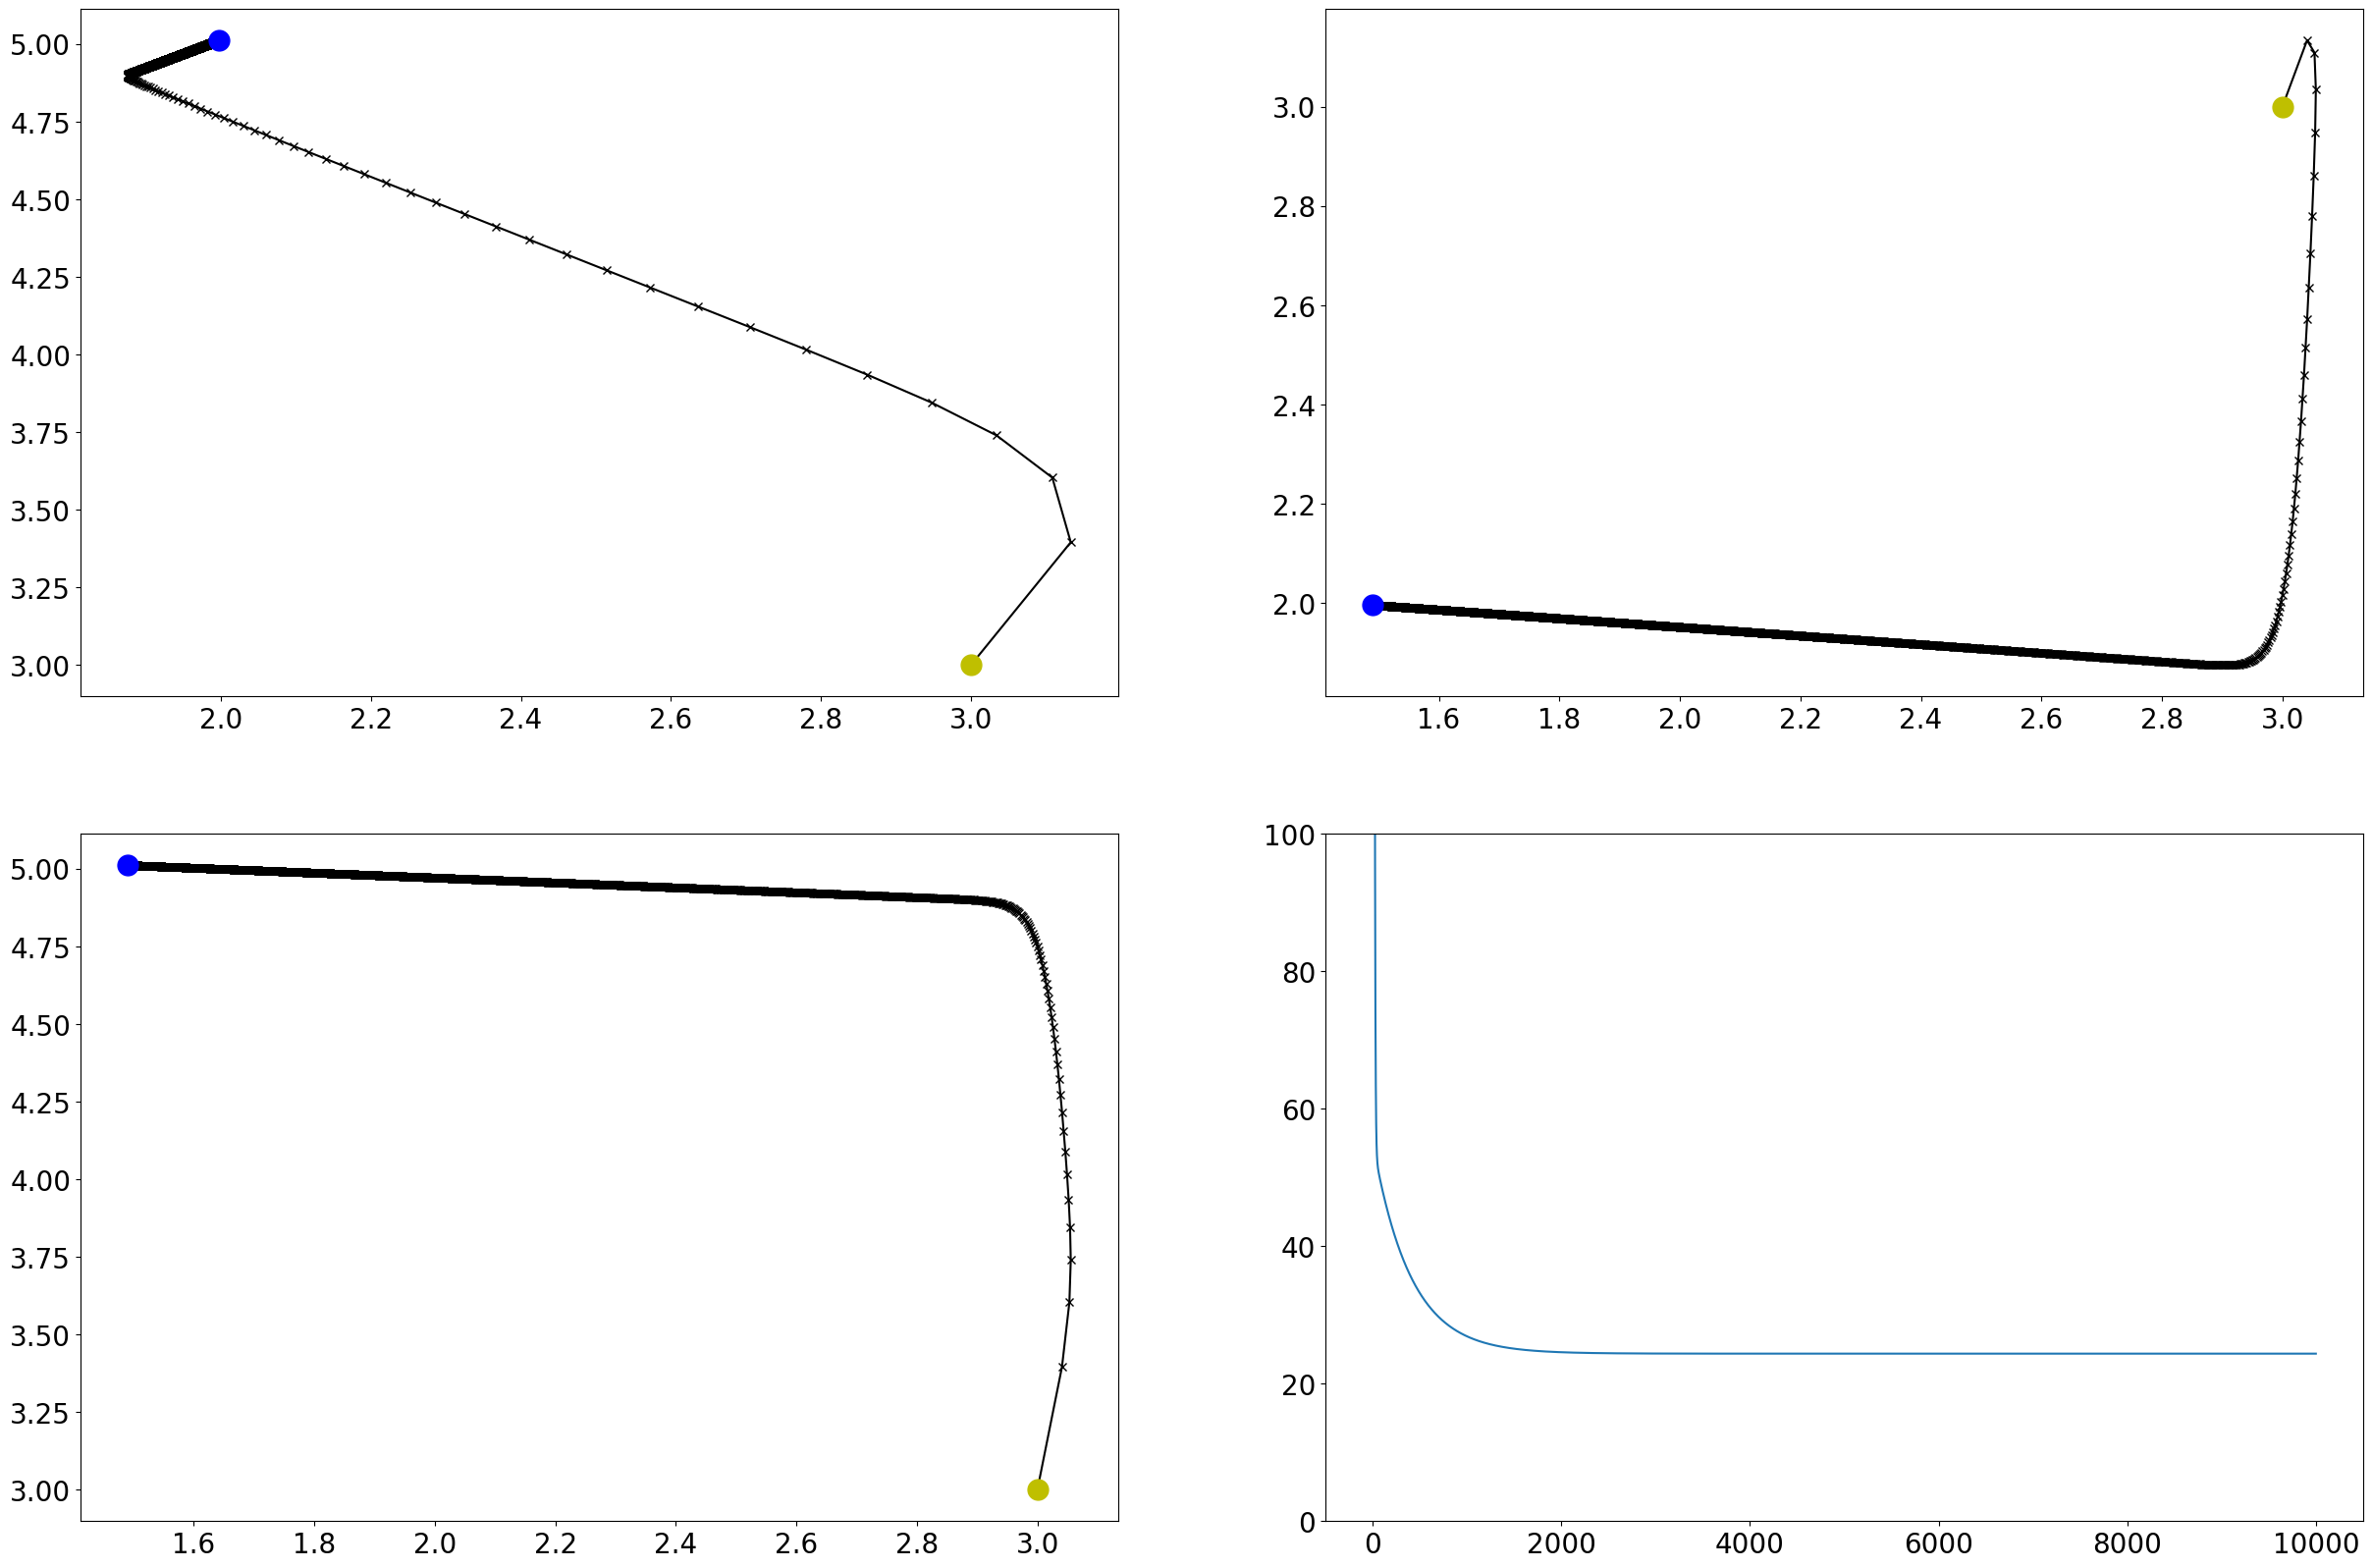

In [726]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
## initial with subplot before ploting each graph
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x') ## zeta_1, zeta_2 ( label : 2, 5 )
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x') ## beta, zeta_1 ( label : 1.5, 2 )
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x') ## beta, zeta_2 ( label : 1.5, 5 )
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4) ## Lost Function Graph 
## x refer to each round of iteration
plt.plot(loss_vec)
plt.ylim([0,100])

theta

## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.

## Exercise (Stochastic Gradient Descent)
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
1. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare? [STUDENT TO COMPLETE THIS]

In [780]:
## Parameters to play with
learning_rate = 0.005
num_iter = 1000  # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter*num_obs)

## Main SGD loop
count = 0
for i in range(num_iter):
    for j in range(num_obs):
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y - y_pred)**2)
        grad_vec = (y[j] - y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count, :] = theta

array([1.53525816, 1.98840863, 4.98852397])

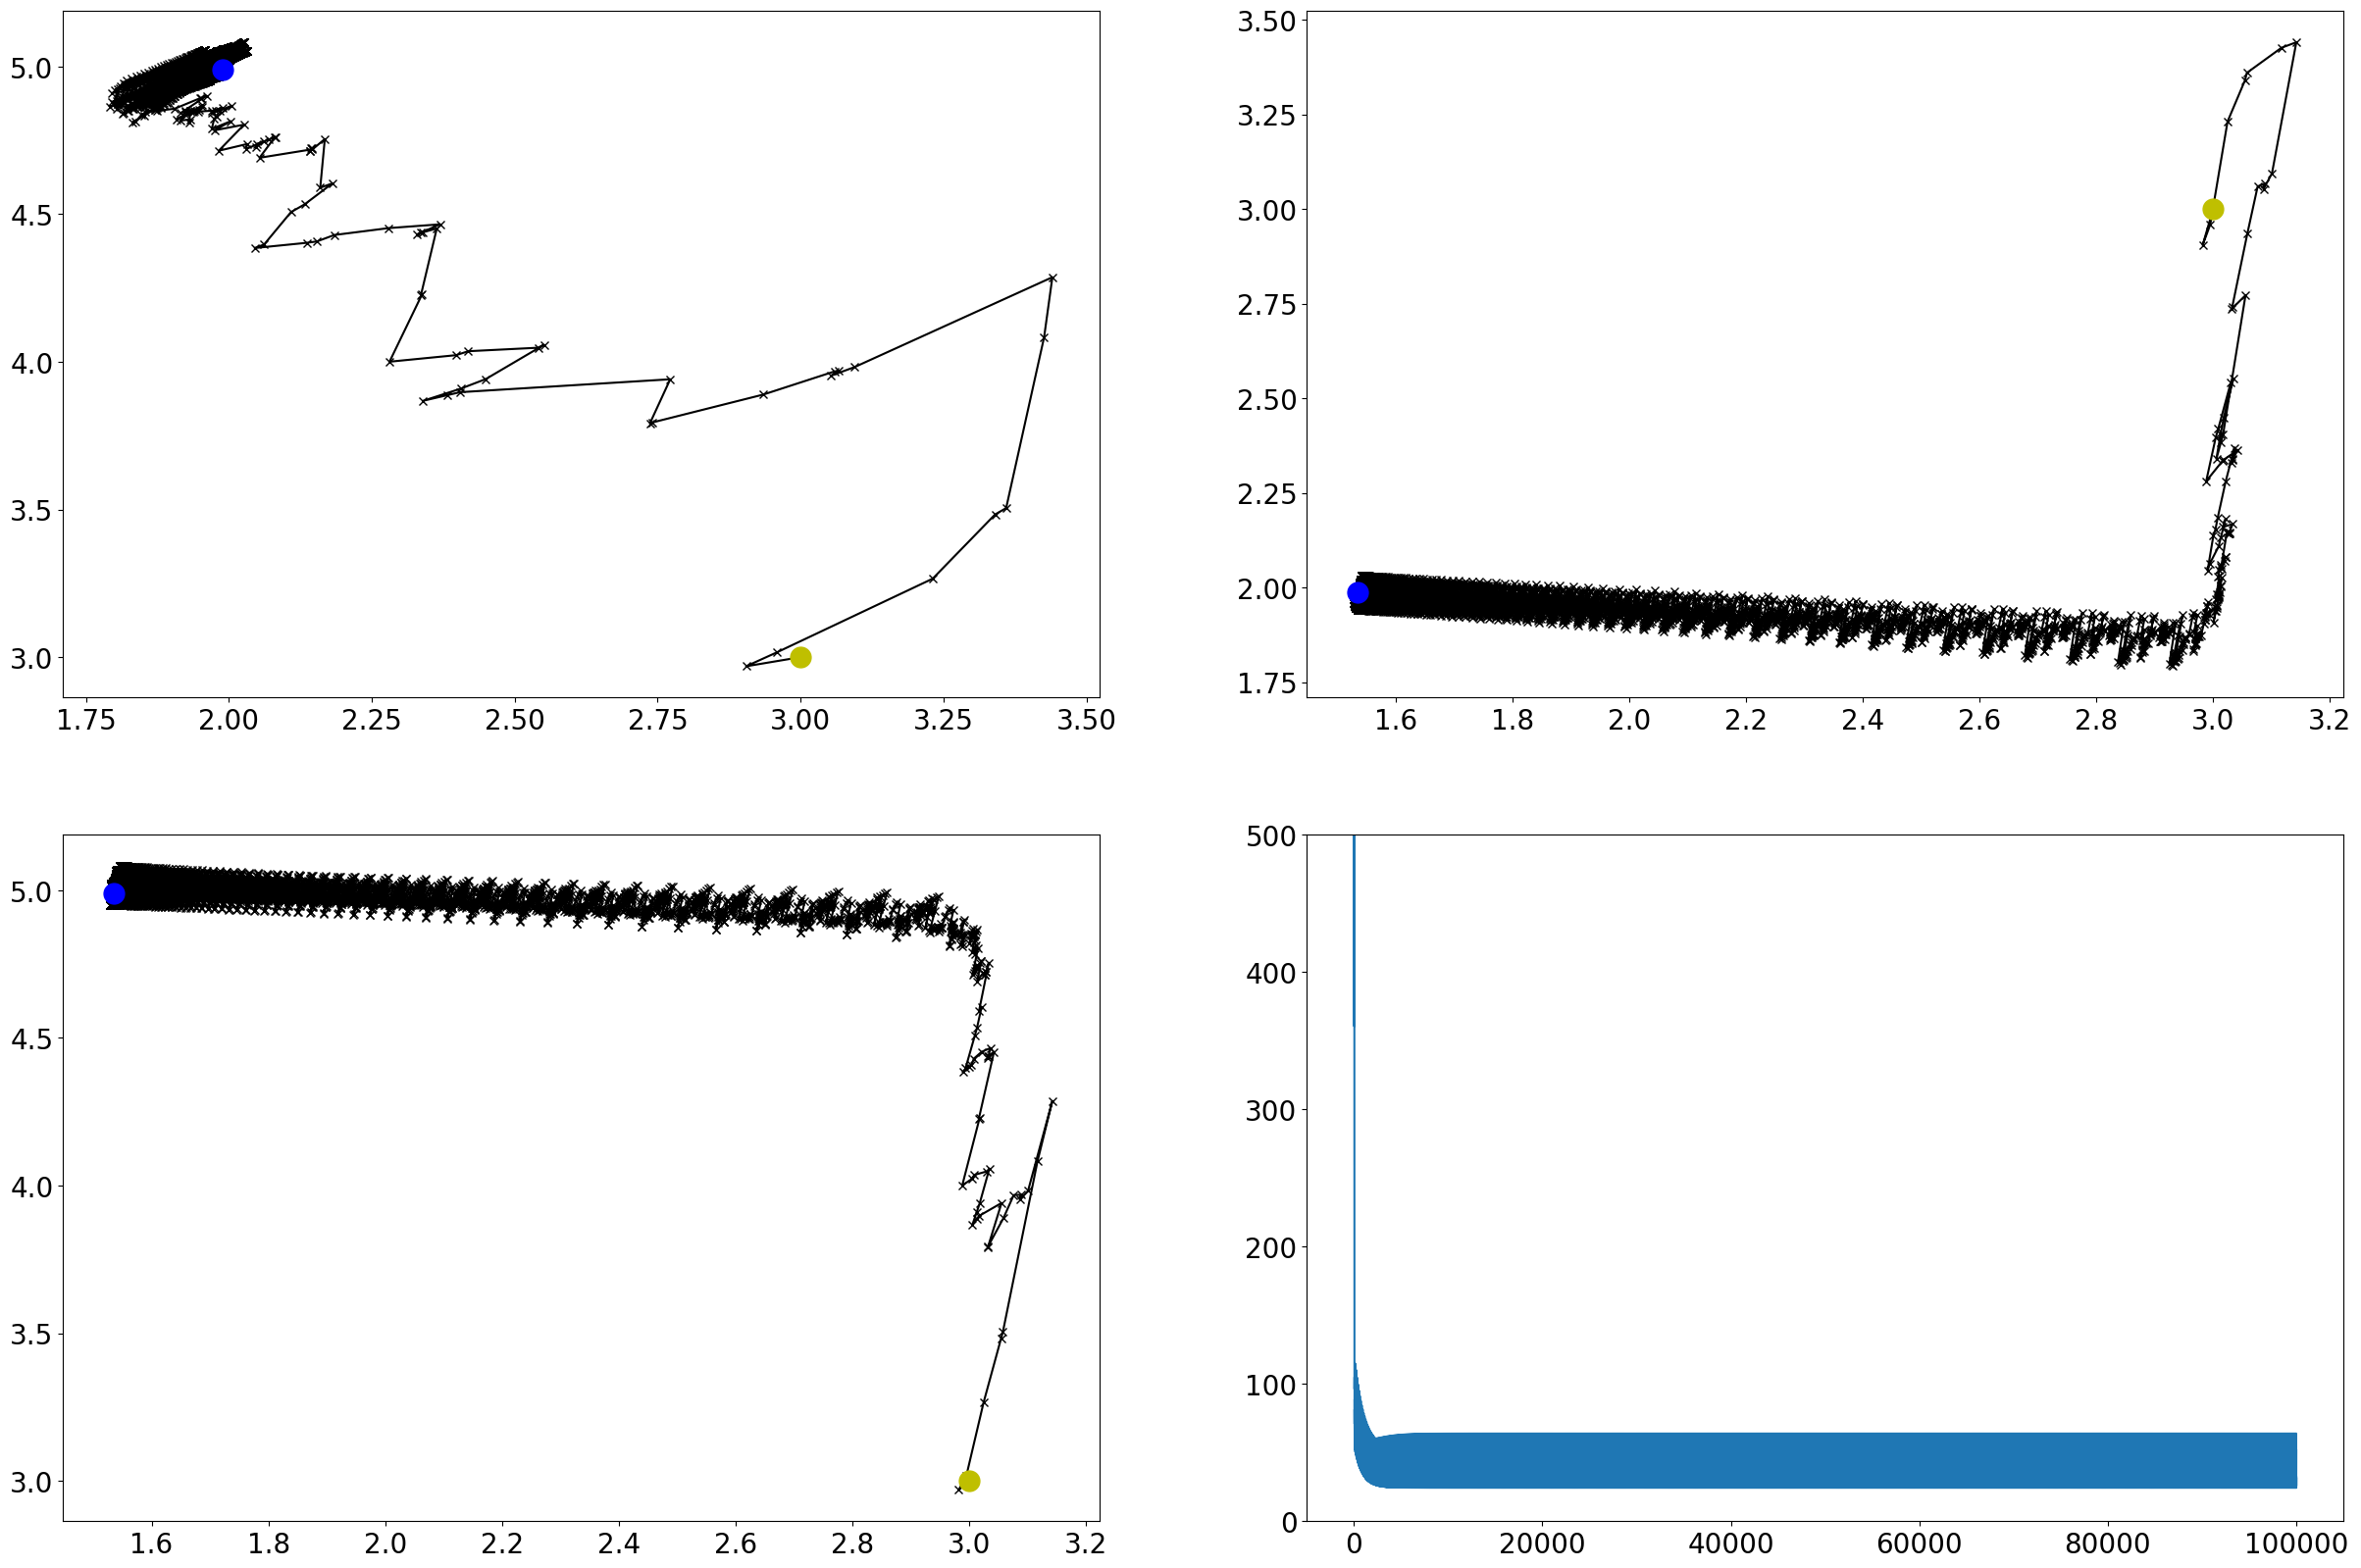

In [781]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

theta

### With Indices Shuffling

In [799]:
## Parameters to play with
learning_rate = 0.008
num_iter = 1000  # The number of "steps" will be num_iter * numobs
theta_initial = np.array([3, 3, 3])

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter * num_obs) + 1, 3))
theta_path[0, :] = theta_initial
loss_vec = np.zeros(num_iter * num_obs)

## Main SGD loop
count = 0
idx = np.arange(num_obs)

for i in range(num_iter):
    np.random.shuffle(idx)
    y = y[idx]
    x_mat = x_mat[idx]
    
    for j in range(num_obs):
        count += 1
        y_pred = np.dot(theta.T, x_mat.T)
        loss_vec[count-1] = np.sum((y - y_pred)**2)
        grad_vec = (y[j] - y_pred[j]) * x_mat[j, :]
        theta = theta + learning_rate * grad_vec
        theta_path[count, :] = theta


array([1.51062177, 2.00135594, 5.03801455])

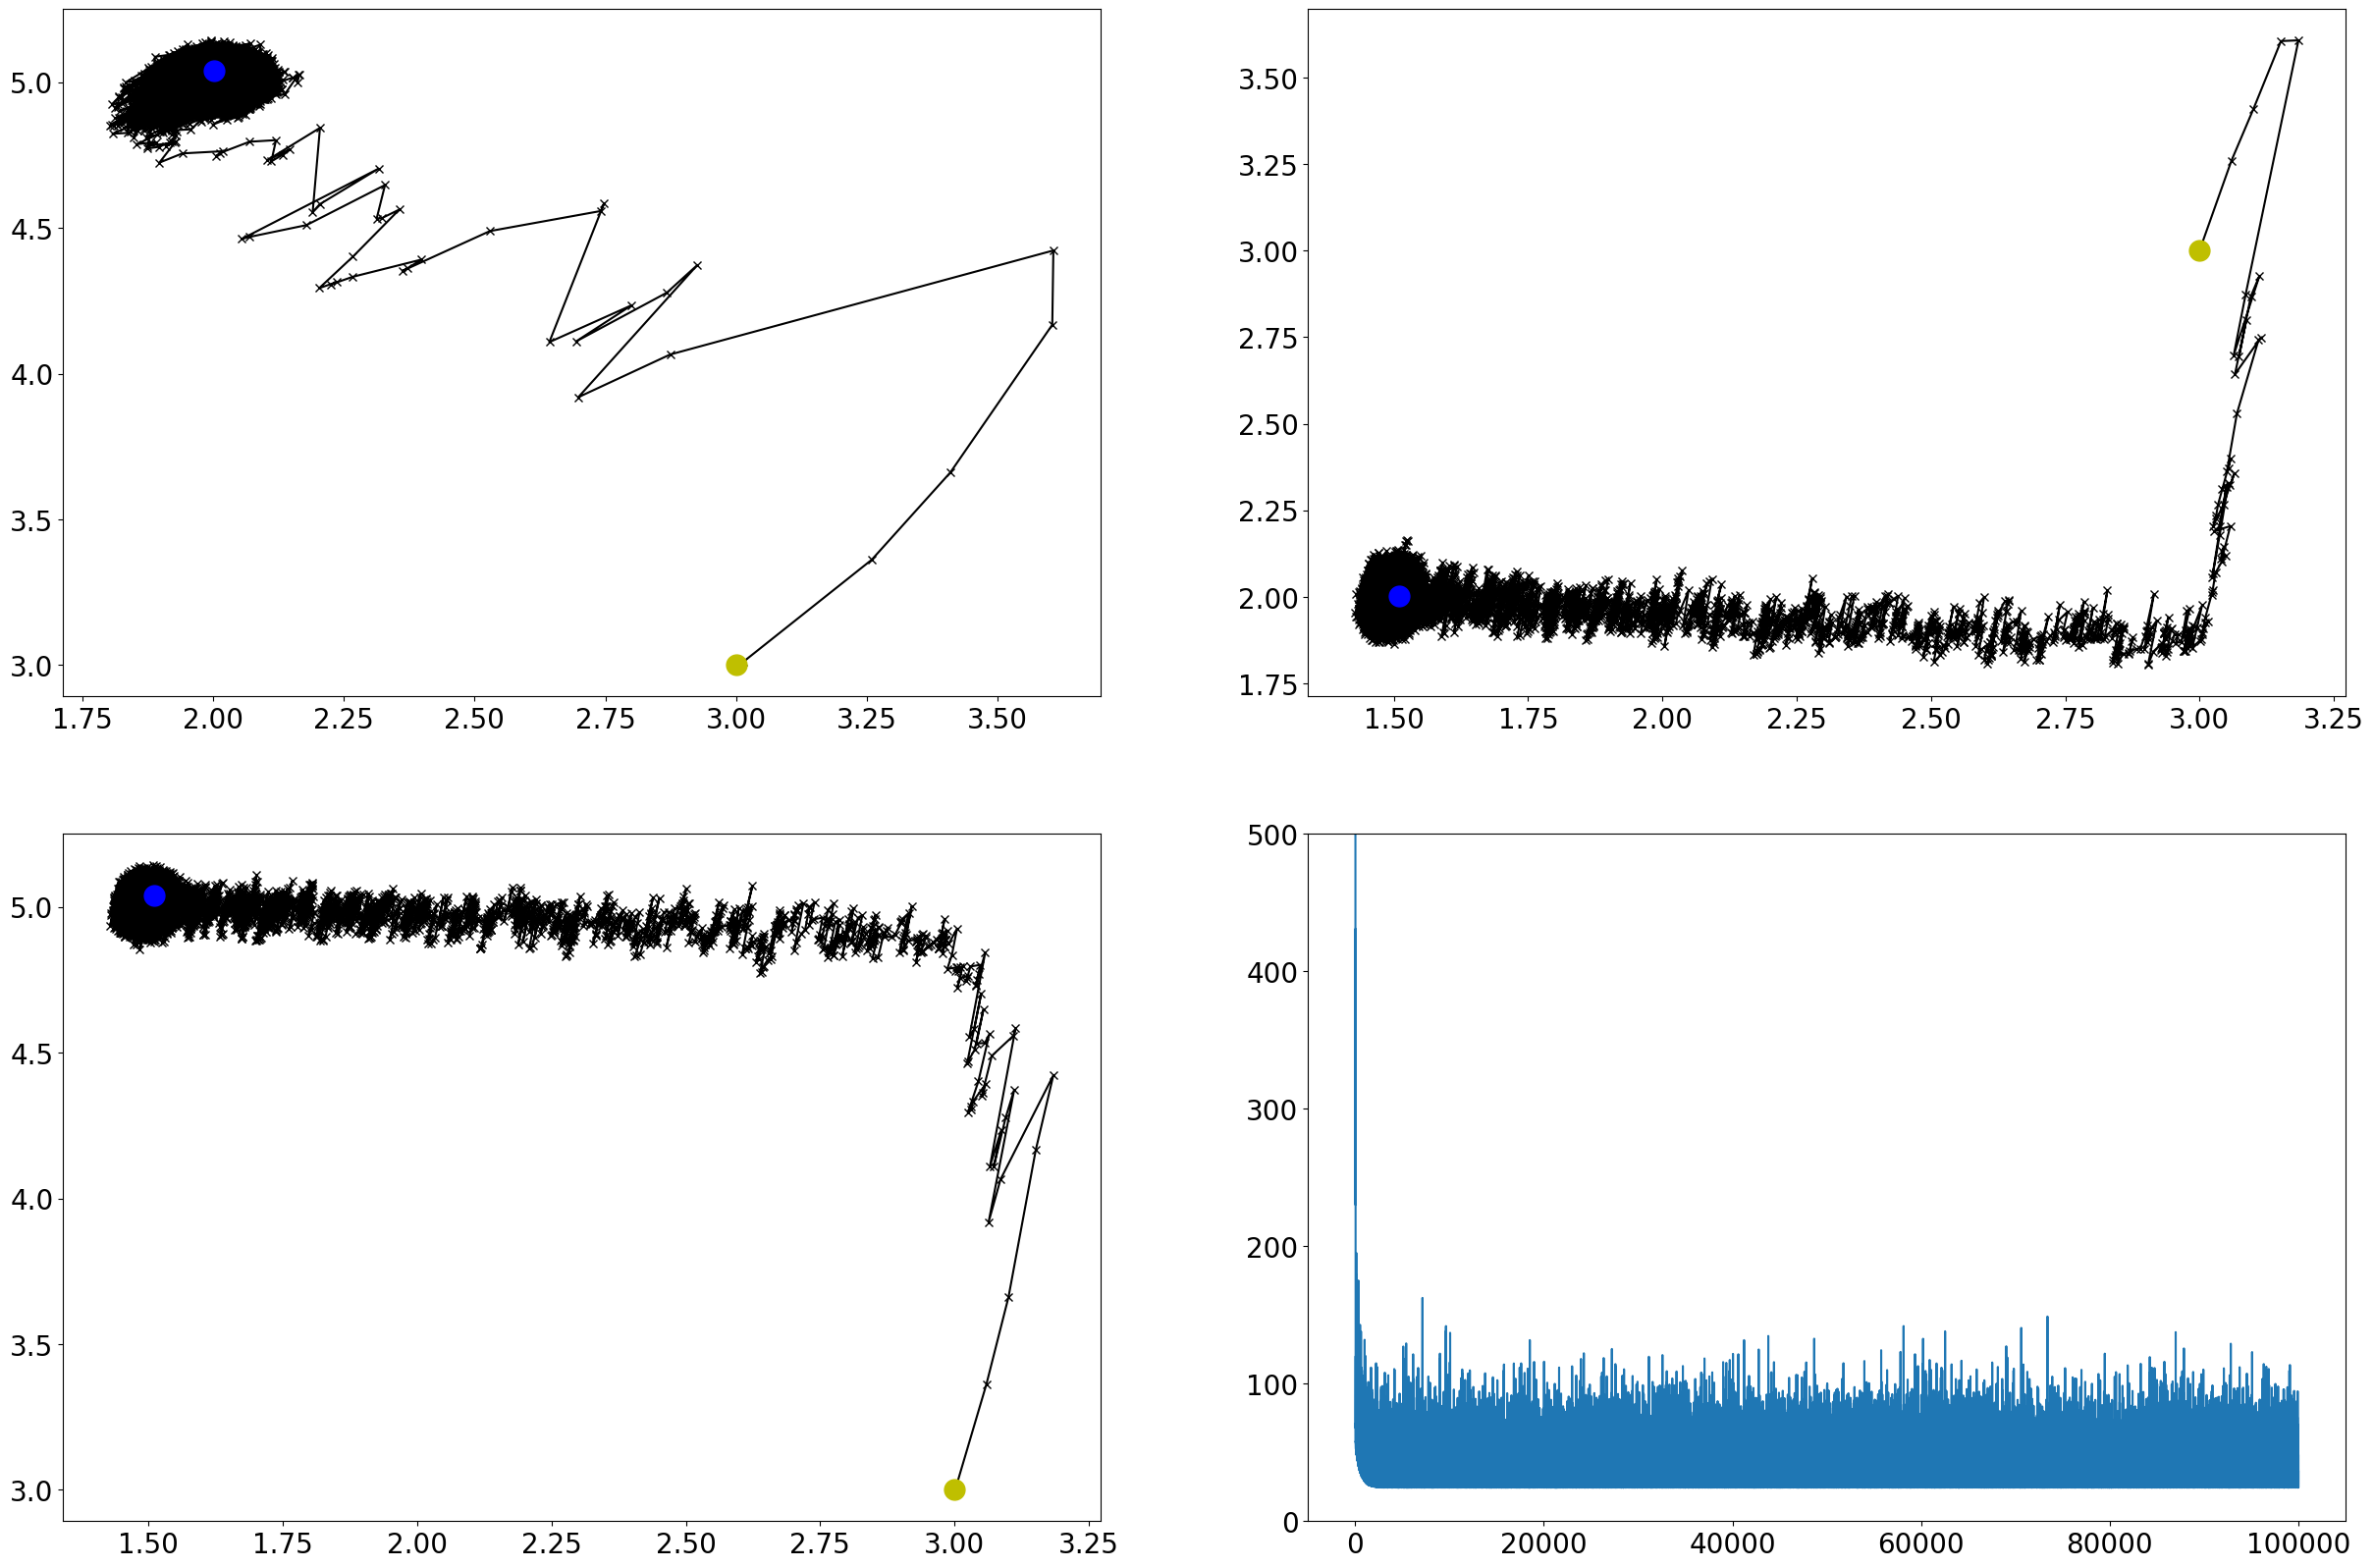

In [800]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

theta

## Exercise (Mini Batch Gradient Descent)
The below code runs Mini Batch Gradient Descent.  

1. Pick a batch size, run the code, and then plot the trajectory of your gradient descent.
1. Observe and explain how the batch size affects the trajectory.

In [801]:
## Parameters to play with
learning_rate = 0.005  # Step size for each iteration
num_iter = 7500  # Total number of iterations
batch_size = 10  # Number of samples in each mini-batch
steps_per_epoch = num_obs // batch_size + int(num_obs % batch_size != 0)  # Number of mini-batches used for one epoch
num_epoch = num_iter // steps_per_epoch  # Number of epochs; the number of "steps" will be num_iter * num_obs / batch_size
theta_initial = np.array([3, 3, 3])  # Initial values for the model parameters

## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_epoch * steps_per_epoch) + 1, 3))  # Initialize an array to store the model parameters at each iteration
theta_path[0, :] = theta_initial  # Initialize the first index for every column with the initial parameters
loss_vec = np.zeros(num_epoch * steps_per_epoch)  # Initialize an array to store the loss at each iteration

count = 0  # Counter for iterations
idx = np.arange(num_obs)  # Create an array of indices [0, 1, 2, ..., num_obs - 1]

for i in range(num_epoch):  # Loop through each epoch
    np.random.shuffle(idx)  # Shuffle the indices to introduce randomness
    y = y[idx]  # Reindex the label array based on the shuffled indices
    x_mat = x_mat[idx]  # Reindex the feature array based on the shuffled indices

    for j in range(steps_per_epoch):  # Loop through each mini-batch in the epoch
        count += 1
        beg = j * batch_size
        end = (j + 1) * batch_size

        '''
        ### Compute predicted values using the current model parameters
            calculates the predicted values y_pred using matrix multiplication between 
            the transpose of the theta vector and the transpose of the feature matrix x_mat

            theta = [theta0, theta1, theta2]
            x_mat = [[x0, x1, x2]]

            theta.T = [[theta0], [theta1], [theta2]]
            x_mat.T = [[x0], [x1], [x2]]

            y_pred = theta0 * x0 + theta1 * x1 + theta2 * x2
        '''
        y_pred = np.dot(theta.T, x_mat.T)

        # Compute the loss and store it in the loss array
        loss_vec[count - 1] = np.sum((y - y_pred) ** 2)

        # Compute the gradient of the loss with respect to the model parameters
        grad_vec = (y[beg:end] - y_pred[beg:end]).dot(x_mat[beg:end, :]) / batch_size

        # Update the model parameters using the gradient and learning rate
        theta = theta + learning_rate * grad_vec

        # Store the updated model parameters in the path array
        theta_path[count, :] = theta

array([1.50496935, 1.99668902, 5.01079374])

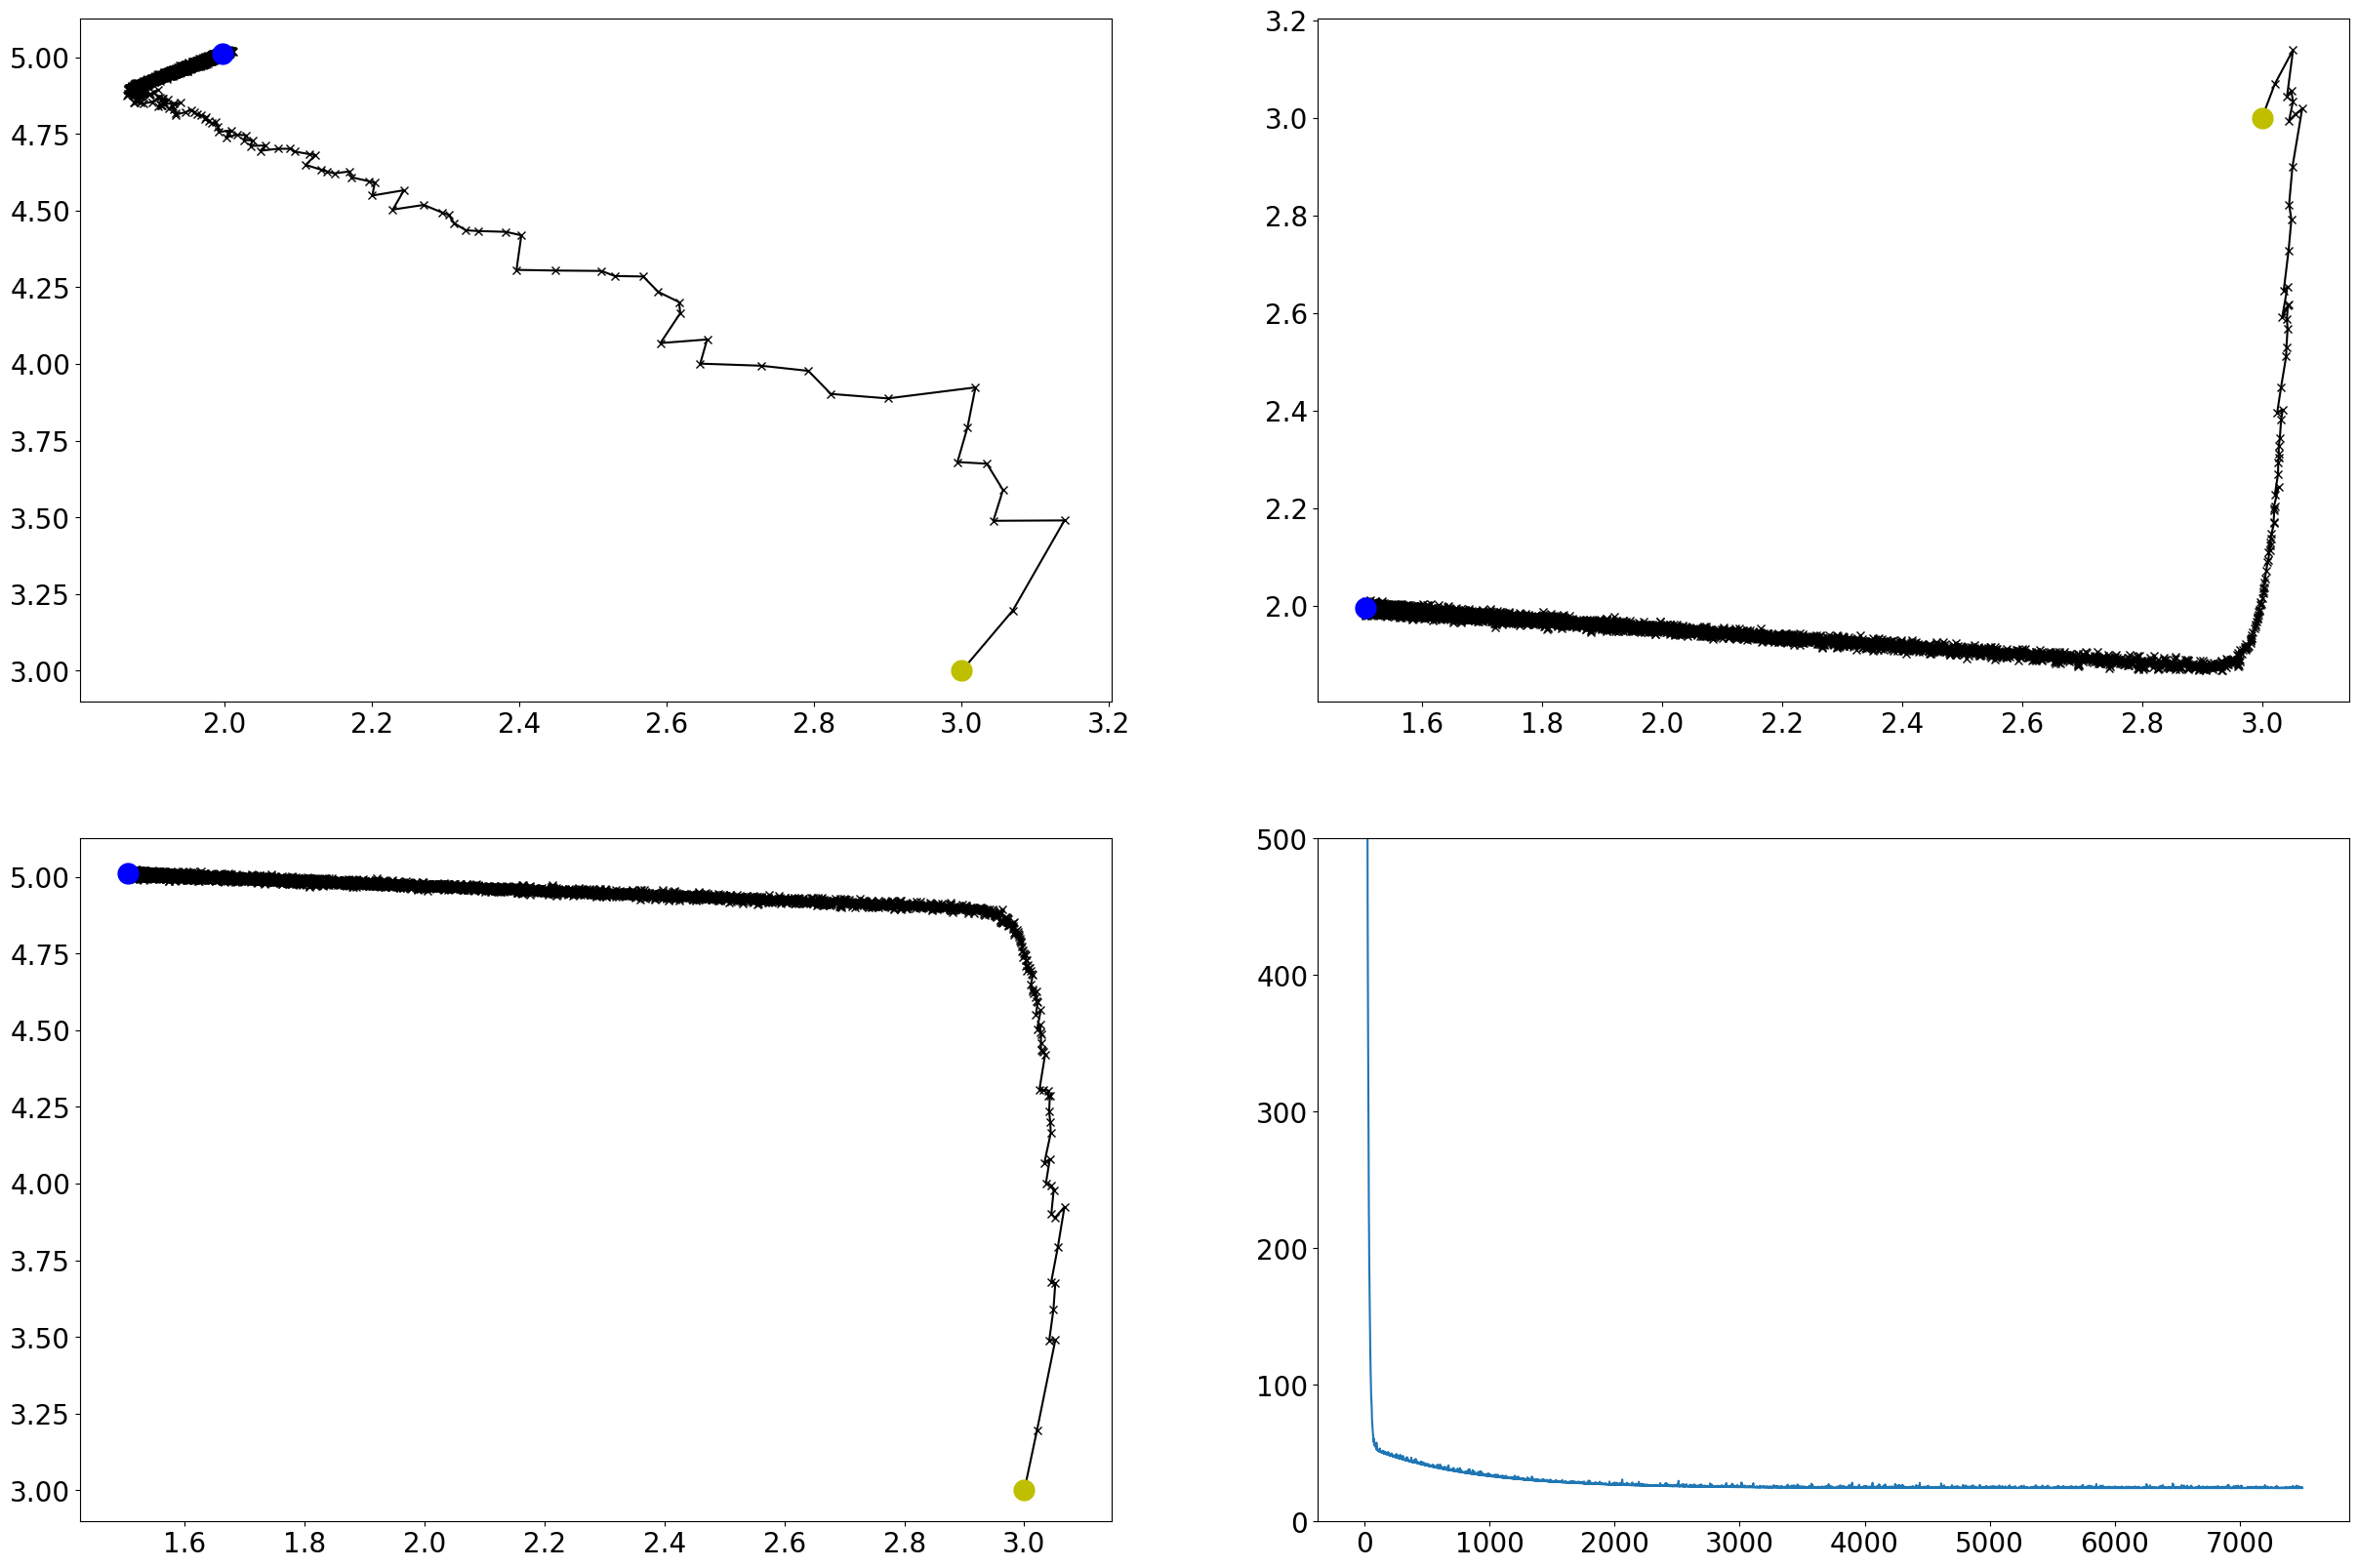

In [802]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30, 20))
plt.subplot(2, 2, 1)
plt.plot(theta_path[:, 1], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 1], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 1], theta_path[-1, 2], 'bo', markersize=15)
plt.subplot(2, 2, 2)
plt.plot(theta_path[:, 0], theta_path[:, 1], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 1], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 1], 'bo', markersize=15)
plt.subplot(2,2,3)
plt.plot(theta_path[:, 0], theta_path[:, 2], 'k-x')
plt.plot(theta_path[0, 0], theta_path[0, 2], 'yo', markersize=15)
plt.plot(theta_path[-1, 0], theta_path[-1, 2], 'bo', markersize=15)

plt.subplot(2, 2, 4)
plt.plot(loss_vec)
plt.ylim([0, 500])

theta

# ขอให้ปรับแก้ไขโค้ดตามลักษณะของคำถาม แล้วจึงตอบคำถามต่อไปนี้
### โดยให้เพิ่ม Cell สำหรับแต่ละคำถาม เพื่อใช้เขียนโค้ดและใช้ผลประกอบคำอธิบาย

epoch : การวนใช้ข้อมูลทุกตัวครบ เช่น gradient descent จะมี epoch = 1 อยู่แล้วเพราะใช้ครบทุกตัว

1. (Gradient Descent) หากค่า learning rate สูงหรือต่ำจนเกินไป มีผลต่อการลู่ของค่าพารามิเตอร์เข้าหาค่าที่ควรจะเป็นอย่างไร

    **ANS** 
    
    : จากการสังเกตของนิสิตการที่่ค่า learning rate สูงหรือต่ำจนเกินไปแล้วมีผลต่อการลู่ของค่าพารามิเตอร์ที่เข้าหาค่าที่ควรจะเป็นนั้น จะต้องอิงจากตัวแปร num_iter หรือจำนวนรอบที่ algorithm จะใช้ในการ update ค่า parameter ของโมเดล 
กรณีที่มีนัยยะ

    - ถ้าค่าของ learning rate น้อยมากๆ, ต้องใช้จำนวนรอบ (num_iter) ที่มากเพื่อให้โมเดลเรียนรู้ด้วยเช่นกันเพื่อให้ลู่เข้าหาค่าที่ควรจะเป็น (learning_rate = 0.0001, num_iter = 1,000,000) จึงกล่าวได้ว่า "**ยิ่ง Learning rate น้อย model ก็ต้องการจำนวนรอบในการเรียนรู้เพิ่มขึ้นเพื่อลู่เข้าหาค่าที่ควรจะเป็น**"
    - ในกรณีของ Gradient Descent, Learning rate มากที่สุดที่ model จะไม่ crash คือประมาณ 0.0309... (learning_rate = 0.0309, num_iter = 6,000)

2. (Stochastic Gradient Descent) การสลับลำดับของข้อมูลที่ใช้ในการหาค่า gradient ส่งผลต่อกราฟ loss อย่างไร

    **ANS** 
    
    : ถ้าไม่สลับลำดับของข้อมูล, การเทรนจะได้ผลลัพธ์เท่าเดิมทุกครั้งเพราะลำดับในการคำนวณเป็นเหมือนเดิมหรือก็คือเรียนรู้ลำดับของข้อมูลเข้าไปด้วย ดังนั้นเมื่อมีการสลับลำดับของข้อมูลแล้ว ค่าที่เข้าสูตรในการคำนวณ loss (np.sum((y - y_pred)**2)) ก็จะแตกต่างและมีการกระจายมากกว่าการเรียนรู้ในข้อมูลที่ไม่ได้สลับลำดับ

3. (Mini Batch Gradient Descent) ค่าของ batch size มีผลต่อการเทรนโมเดลอย่างไร

    **ANS** 
    
    - เวลาที่ใช้ในการเทรนโมเดล, ถ้า batch_size เล็ก เวลาในการเทรนก็จะน้อยลงด้วย เนื่องจากการ take advantage ในการคำนวณแบบ parallel ของ hardware อย่าง GPU ในปัจจุบัน
    
        - num_iter : 2,500,000 
        - batch_size : 10, time spent : 13.8s
        - batch_size : 25, time spent : 15.3s
        - batch_size : 50, time spent : 18.2s
        - batch_size : 100, time spent : 23.1s

        <br>

    - noise ที่เข้าไปในการเทรน, ถ้า batch_size เล็กหรือก็คือ subset ของข้อมูลก็จะเล็กลง ซึ่งเมื่อเทียบสัดส่วนของ noise ที่กระจายเข้าไปในข้อมูลที่มี batch_size ใหญ่ noise ก็จะไม่กระทบและสร้างความแตกต่างให้กับข้อมูลมาก แต่ถ้า batch_size เล็ก noise จะมีผลและอาจเปลี่ยนนัยยะของข้อมูลเดิมไป

4. (Mini Batch Gradient Descent) จำนวน epoch ที่สูงหรือต่ำจนเกินไป มีผลต่อการเทรนโมเดลอย่างไร

    **ANS**

    - กรณีที่ **num_epoch สูงจนเกินไป** จะเกิดเคสที่ model เรียนรู้และเก็บ behavior ของ training data มากเกินไปหรือก็คือ overfitting ซึ่งลู่ออกจาก true function ที่เราต้องการ

    - กรณีที่ **num_epoch ต่ำจนเกินไป** จะเกิดเคสที่ model เรียนรู้และเก็บ behavior ของ training data ไม่เพียงพอ หรือสังเกตจากกราฟ loss ซึ่งยังเรียนรู้ไม่ถึงจุดที่เหมาะสมแต่ถูก terminate ไปแล้ว ซึ่งก็คือ underfitting, เป็นกรณีที่ทั้งเรียนรู้ behavior ของ training data ไม่เพียงพอก็จึงไม่สามารถเกาะ true function ได้เช่นกัน